In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset with the correct delimiter
file_path = 'bank-full.csv'
data = pd.read_csv(file_path, delimiter=';')

# Display basic info about the dataset
print("Columns in the dataset:")
print(data.columns)

# Save the cleaned dataset in Colab folder
cleaned_file_path = 'cleaned_bank.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")

Columns in the dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Cleaned dataset saved to cleaned_bank.csv


In [5]:
#create data drame to read data set
df = pd.read_csv('cleaned_bank.csv')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
# check the df structe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# find number of rows and column
df.shape

(45211, 17)

In [9]:
# describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# Identify and process columns with object data types
object_columns = df.dtypes[df.dtypes == 'object'].index

for column in object_columns:
    print(f"Column: {column}")
    print("Unique Values:", df[column].unique())


Column: job
Unique Values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column: marital
Unique Values: ['married' 'single' 'divorced']
Column: education
Unique Values: ['tertiary' 'secondary' 'unknown' 'primary']
Column: default
Unique Values: ['no' 'yes']
Column: housing
Unique Values: ['yes' 'no']
Column: loan
Unique Values: ['no' 'yes']
Column: contact
Unique Values: ['unknown' 'cellular' 'telephone']
Column: month
Unique Values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column: poutcome
Unique Values: ['unknown' 'failure' 'other' 'success']
Column: y
Unique Values: ['no' 'yes']


# Feature Engineering

In [43]:
df2=df.copy()

In [44]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [45]:
df2.shape

(45211, 17)

In [46]:
#defaut features does not play imp role
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [47]:
df2.drop(['default'],axis=1, inplace=True)

In [48]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [49]:
# drop pdays as it has -1 value for around 40%+
df2.drop(['pdays'],axis=1, inplace=True)

In [50]:
# remove outliers in feature age
df2['age'].value_counts().sort_index()


,count
age,
18,12
19,35
20,50
21,79
22,129
...,...
90,2
92,2
93,2


In [51]:
# remove outliers in feature balance
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [52]:
# remove outliers in feature campaign
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [53]:
df3 = df2[df2['campaign'] < 33]

In [54]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
yes  1            2561
     2            1401
     3             618
     4             317
     5             139
     6              92
     7              47
     8              32
     9              21
     10             14
     11             16
     12              4
     13              6
     14              4
     15              4
     16              2
     17              6
     20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, dtype: int64

In [56]:
# remove outliers in feature previous...
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           33532
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Name: previous, Length: 66, dtype: int64

In [57]:
df4 = df3[df3['previous'] < 31]

In [58]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in cat_columns:
    df4 = df4.join(pd.get_dummies(df4[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False))
    df4.drop(col, axis=1, inplace=True)


In [59]:
bool_columns = ['housing', 'loan', 'y']
for col in bool_columns:
    df4[col + '_new'] = df4[col].map({'yes': 1, 'no': 0})
    df4.drop(col, axis=1, inplace=True)


In [60]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,y_new
0,58,2143,5,261,1,0,False,False,False,True,...,True,False,False,False,False,False,True,1,0,0
1,44,29,5,151,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,0
2,33,2,5,76,1,0,False,True,False,False,...,True,False,False,False,False,False,True,1,1,0
3,47,1506,5,92,1,0,True,False,False,False,...,True,False,False,False,False,False,True,1,0,0
4,33,1,5,198,1,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0


# Exploratory Data Analysis


1. Find Unwanted Columns

*   There is no unwanted column present in given dataset to remove



2. Find Missing Values

In [61]:
# find missing values
features_na = [feature for feature in df.columns if df[feature].isnull().any()]
if features_na:
    for feature in features_na:
        print(f"{feature}: {np.round(df[feature].isnull().mean() * 100, 4)}% missing values")
else:
    print("No missing value found")


No missing value found


3. Find Features with One Value

In [62]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


4. Explore the Categorical Features

In [63]:
categorical_features = df.select_dtypes('object').columns.tolist()
categorical_features = [feature for feature in categorical_features if feature != 'y']
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [64]:
for feature in categorical_features:
    unique_count = df[feature].nunique()
    print(f'The feature is {feature} and number of categories are {unique_count}')


The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


5. Find Categorical Feature Distribution

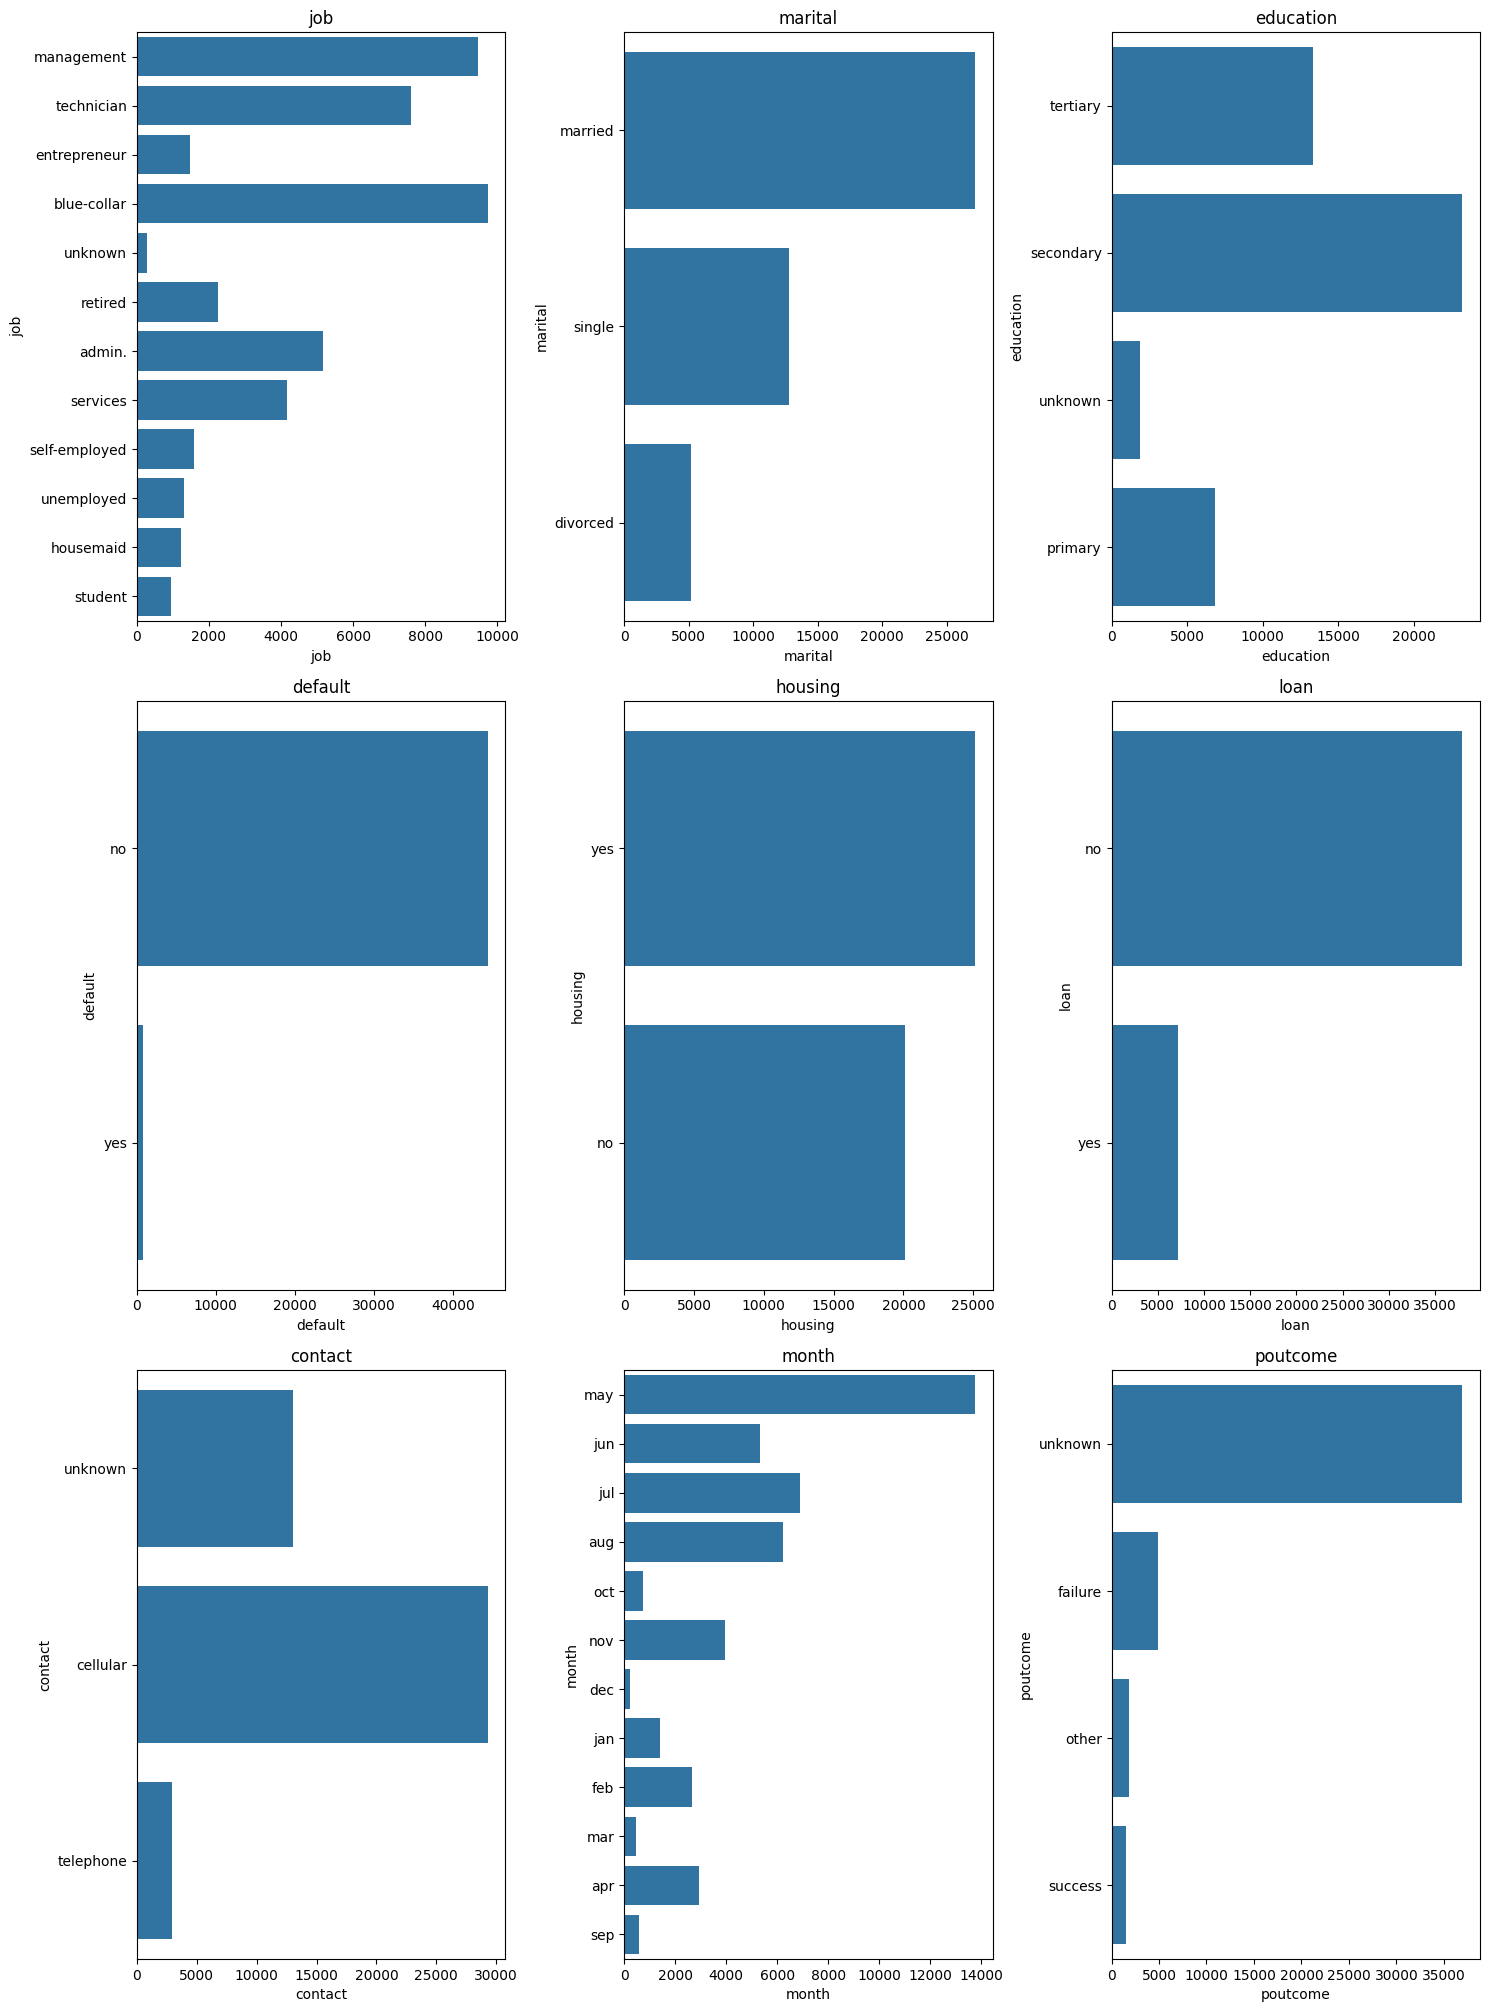

In [65]:
#check count based on categorical features
plt.figure(figsize=(15, 80), facecolor='white')
for i, categorical_feature in enumerate(categorical_features, 1):
    ax = plt.subplot(12, 3, i)
    sns.countplot(y=categorical_feature, data=df)
    ax.set_xlabel(categorical_feature)
    ax.set_title(categorical_feature)
plt.tight_layout()
plt.show()



6. Relationship between Categorical Features and Label

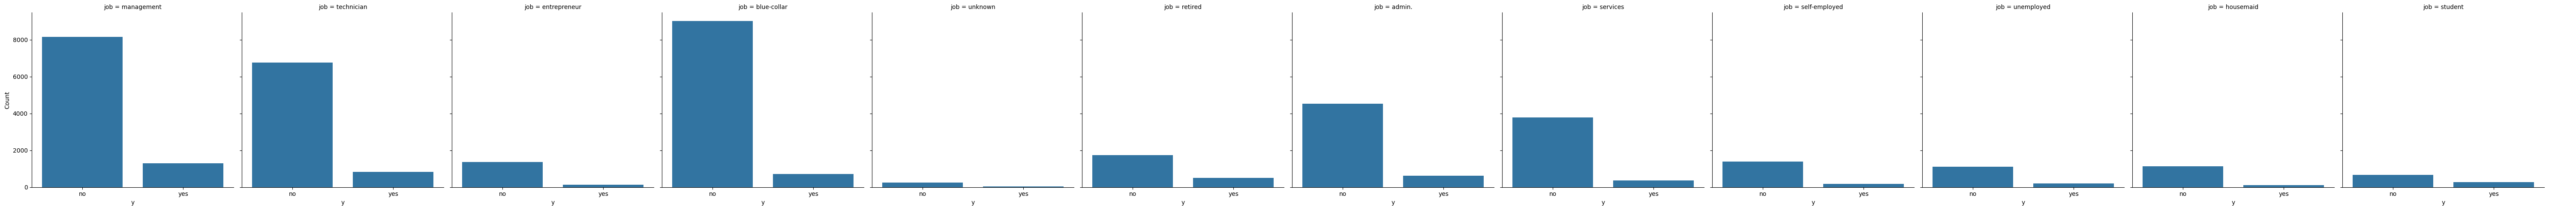

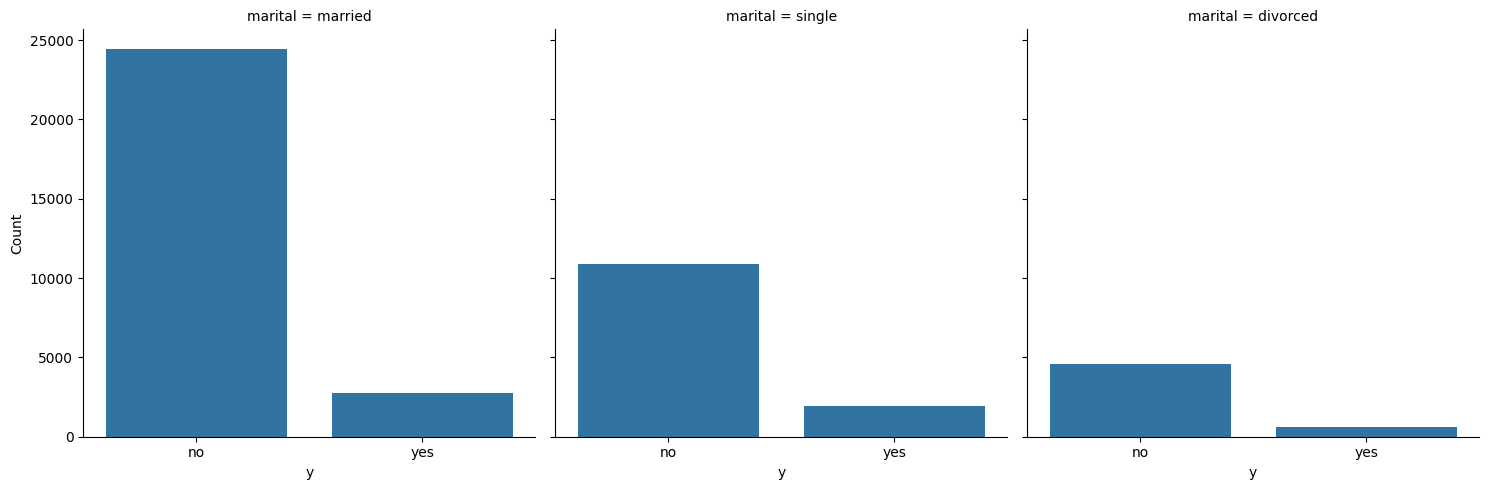

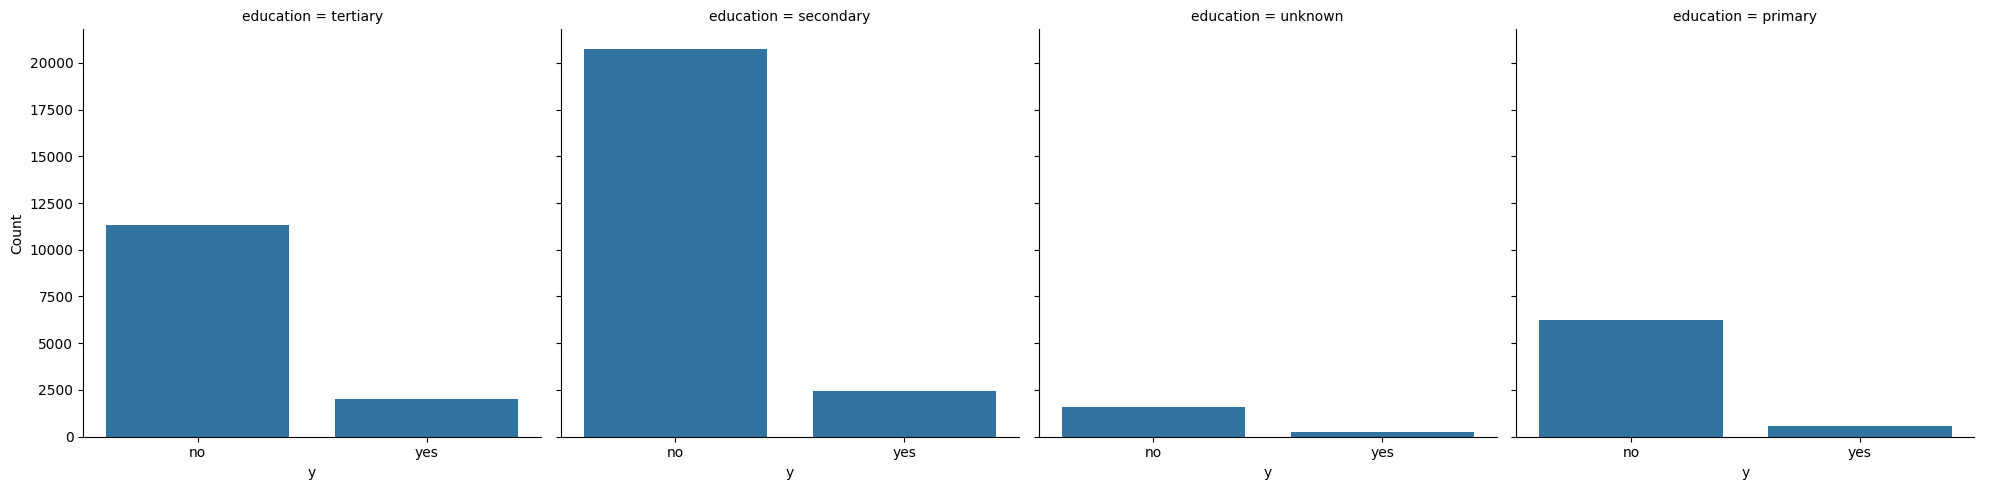

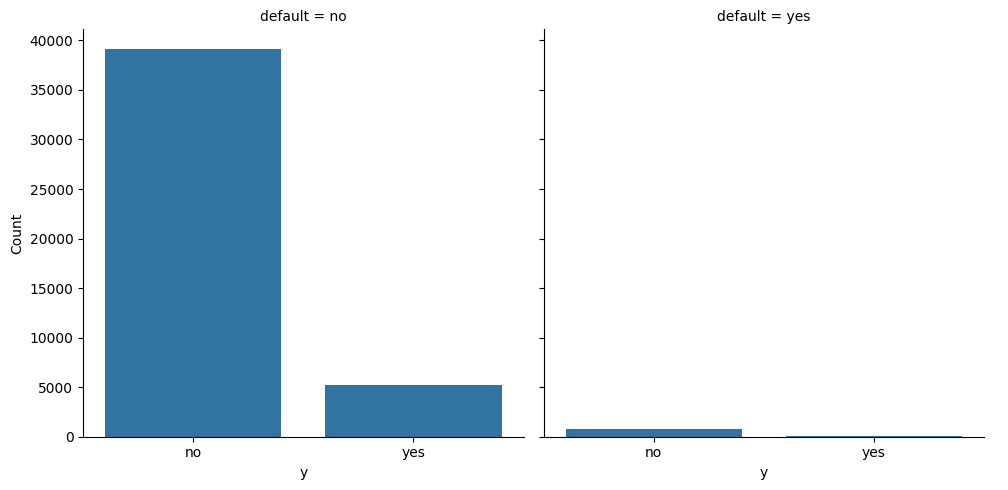

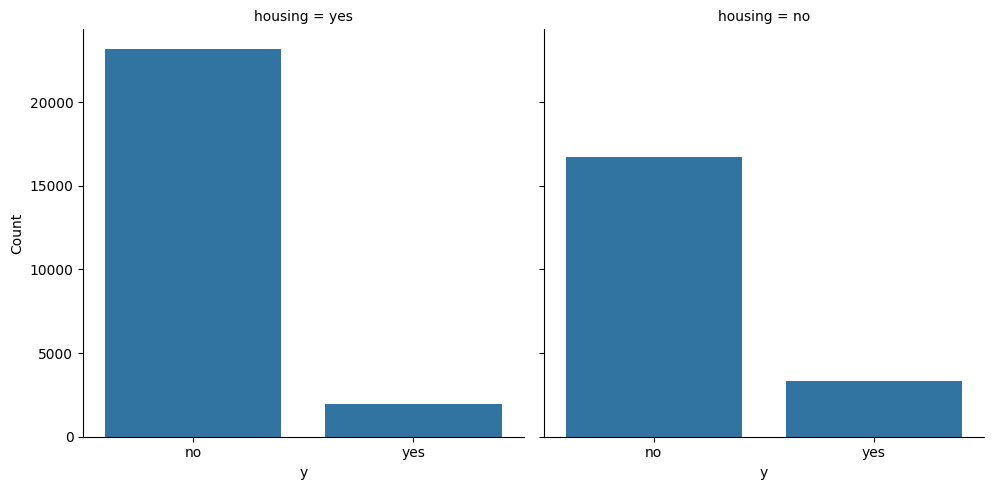

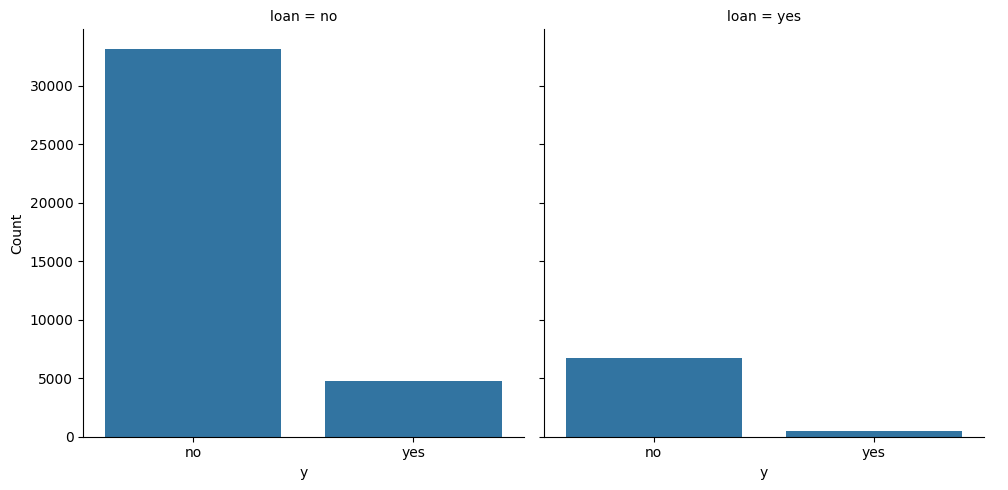

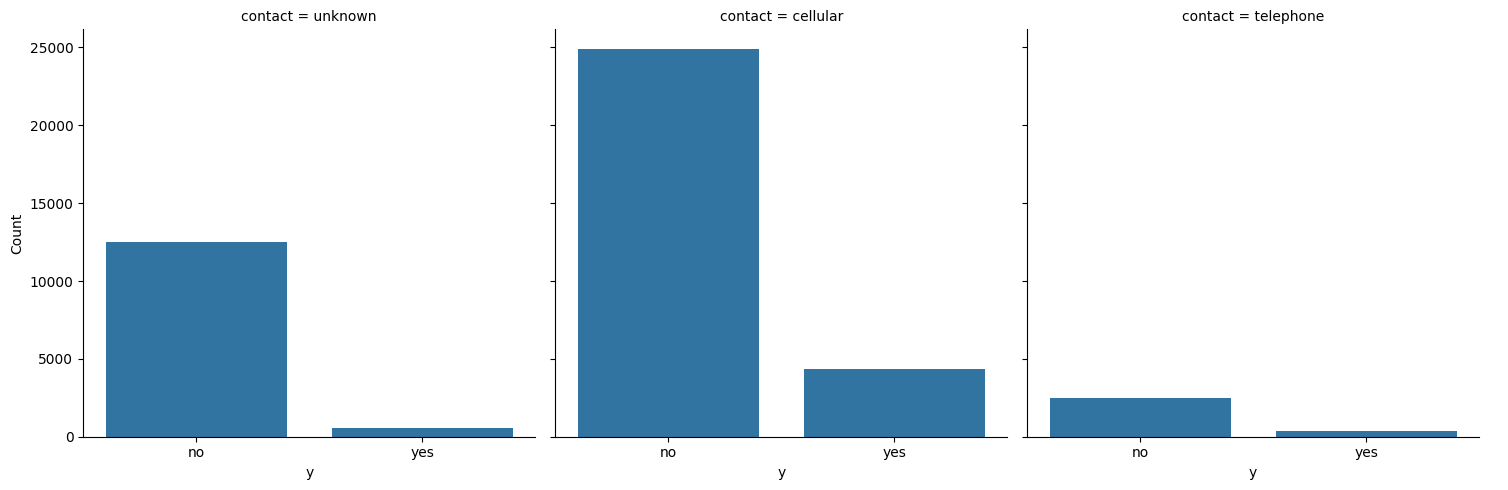

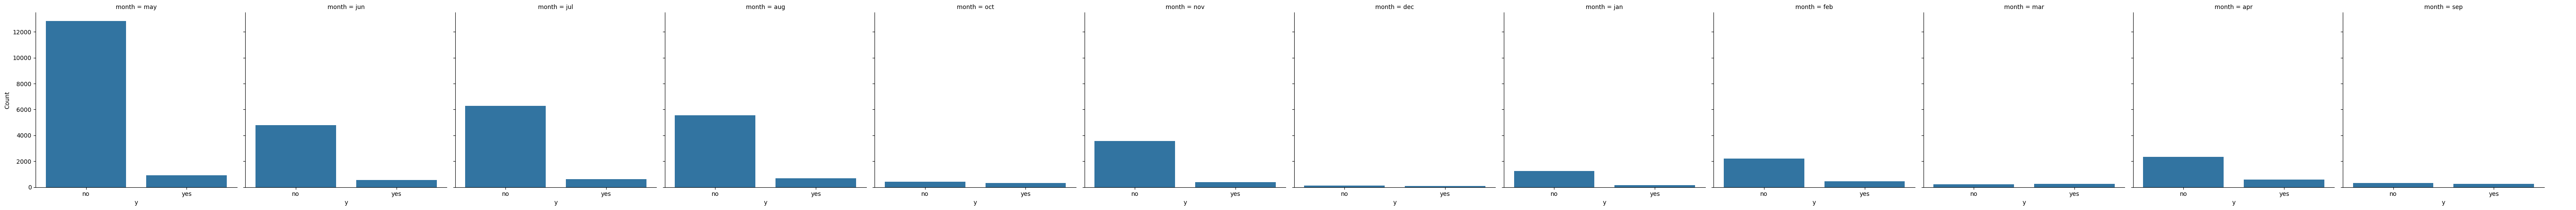

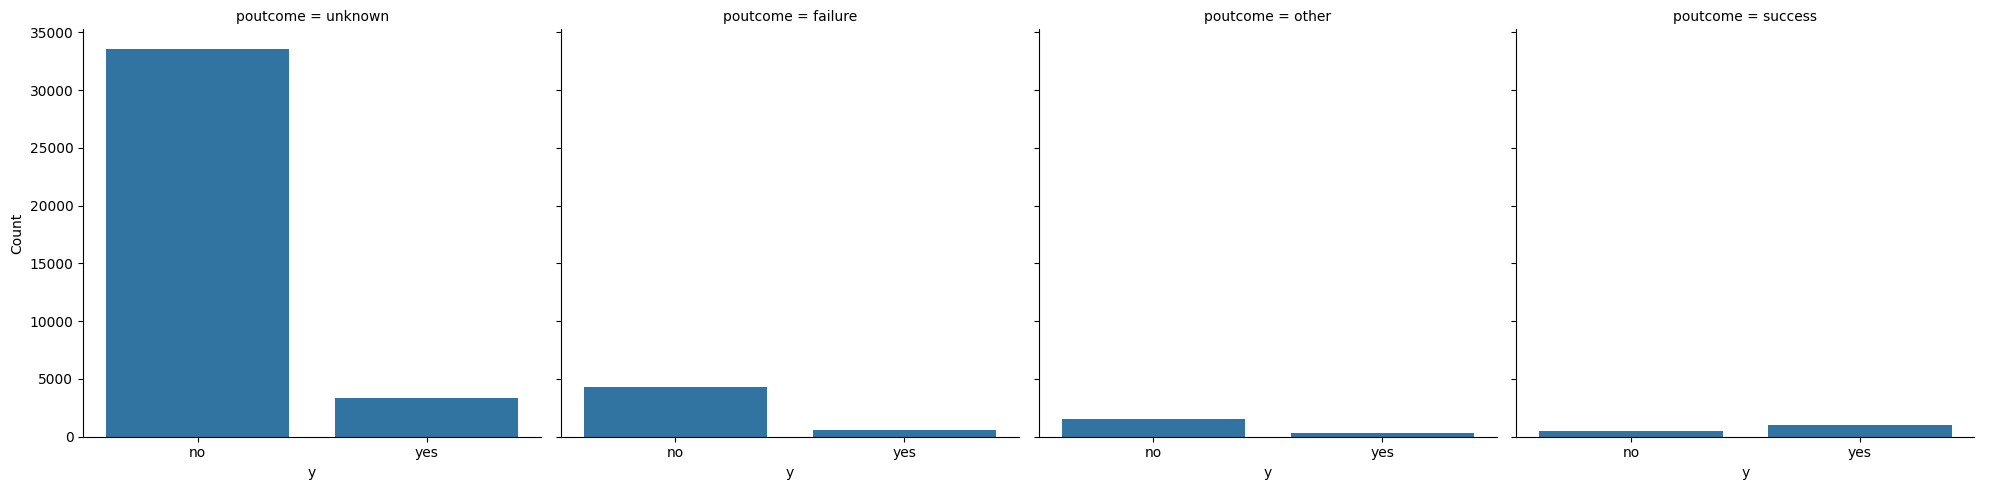

In [66]:
# Check target label split over categorical features
# Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    g = sns.catplot(x='y', col=categorical_feature, kind='count', data=df)
    g.set_axis_labels('y', 'Count')
plt.show()


In [67]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    count_data = df.groupby(['y', categorical_feature]).size()
    print(f"Target label distribution for {categorical_feature}:")
    print(count_data, "\n")


Target label distribution for job:
y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64 

Target label distribution for marital:
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64 

Target label distribution for education:
y    education
no   primary       62

7. Explore the Numerical Features

In [68]:
# List of numerical variables
numerical_features = df.select_dtypes(exclude=['object']).columns.difference(['y']).tolist()
print(f'Number of numerical variables: {len(numerical_features)}')

# Visualize the numerical variables
df[numerical_features].head()


Number of numerical variables: 7


,age,balance,campaign,day,duration,pdays,previous
0,58,2143,1,5,261,-1,0
1,44,29,1,5,151,-1,0
2,33,2,1,5,76,-1,0
3,47,1506,1,5,92,-1,0
4,33,1,1,5,198,-1,0


8. Find Discrete Numerical Features

In [69]:
discrete_feature = [feature for feature in numerical_features if df[feature].nunique() < 25]
print(f"Discrete Variables Count: {len(discrete_feature)}")


Discrete Variables Count: 0


9. Relation between Discrete numerical Features and Labels

*   NA




10. Find Continous Numerical Features

In [70]:
continuous_features = list(filter(lambda feature: feature not in discrete_feature + ['y'], numerical_features))
print(f"Continuous feature Count: {len(continuous_features)}")


Continuous feature Count: 7


11. Distribution of Continous Numerical Features

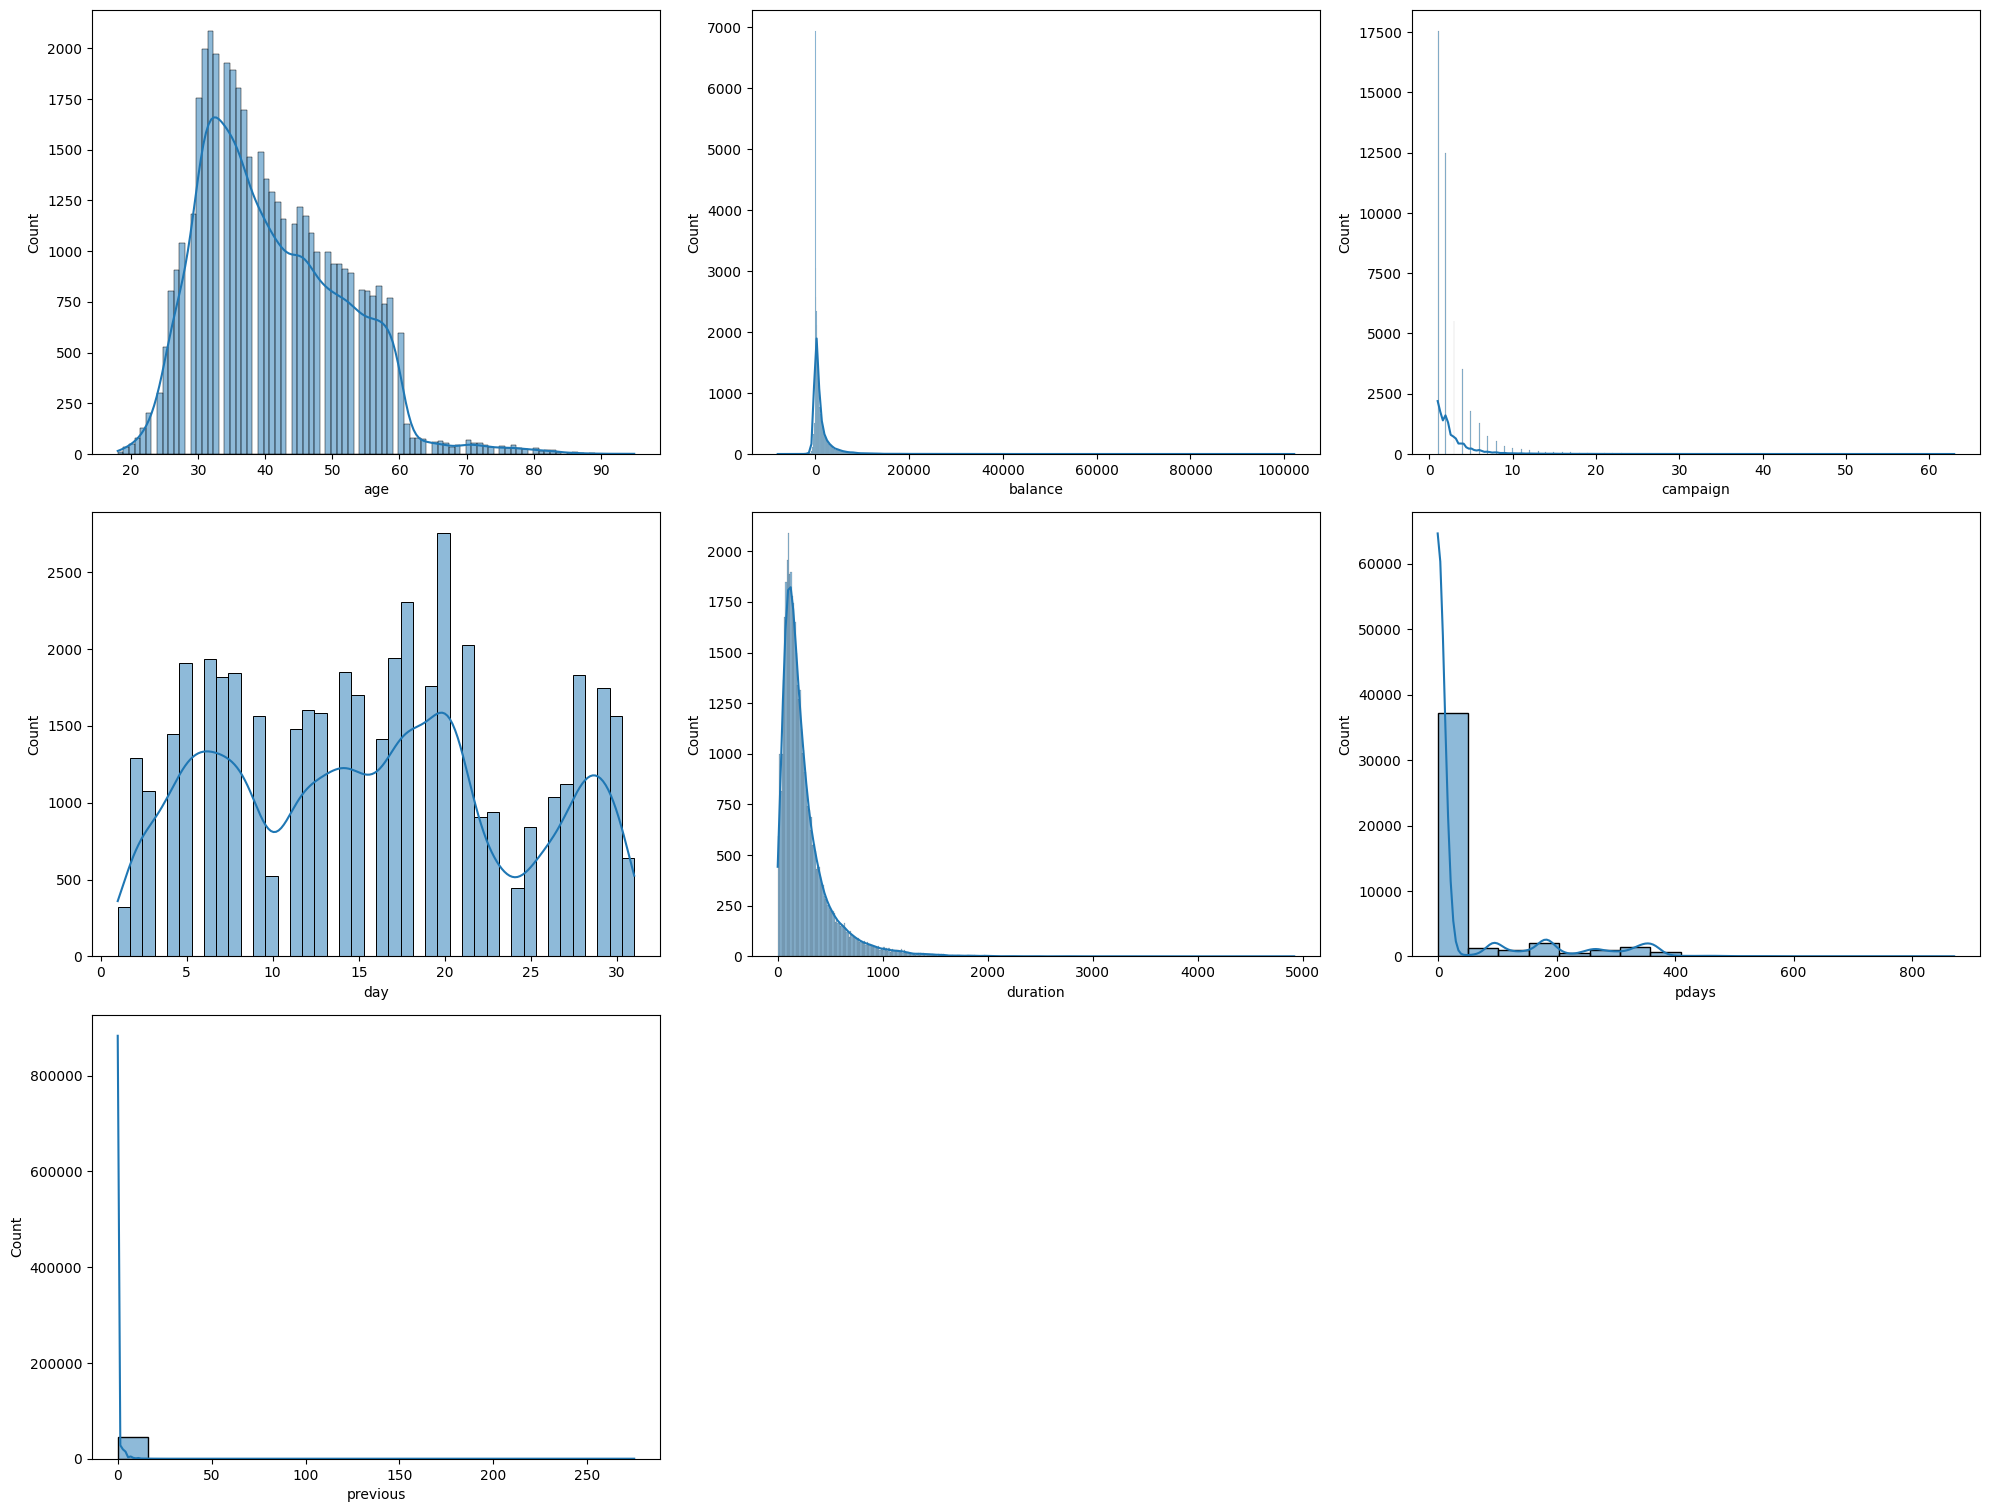

In [71]:
plt.figure(figsize=(20, 60), facecolor='white')
for i, continuous_feature in enumerate(continuous_features, 1):
    ax = plt.subplot(12, 3, i)
    sns.histplot(df[continuous_feature], kde=True)
    ax.set_xlabel(continuous_feature)
plt.tight_layout()
plt.show()


12. Relation between Continous numerical Features and Labels

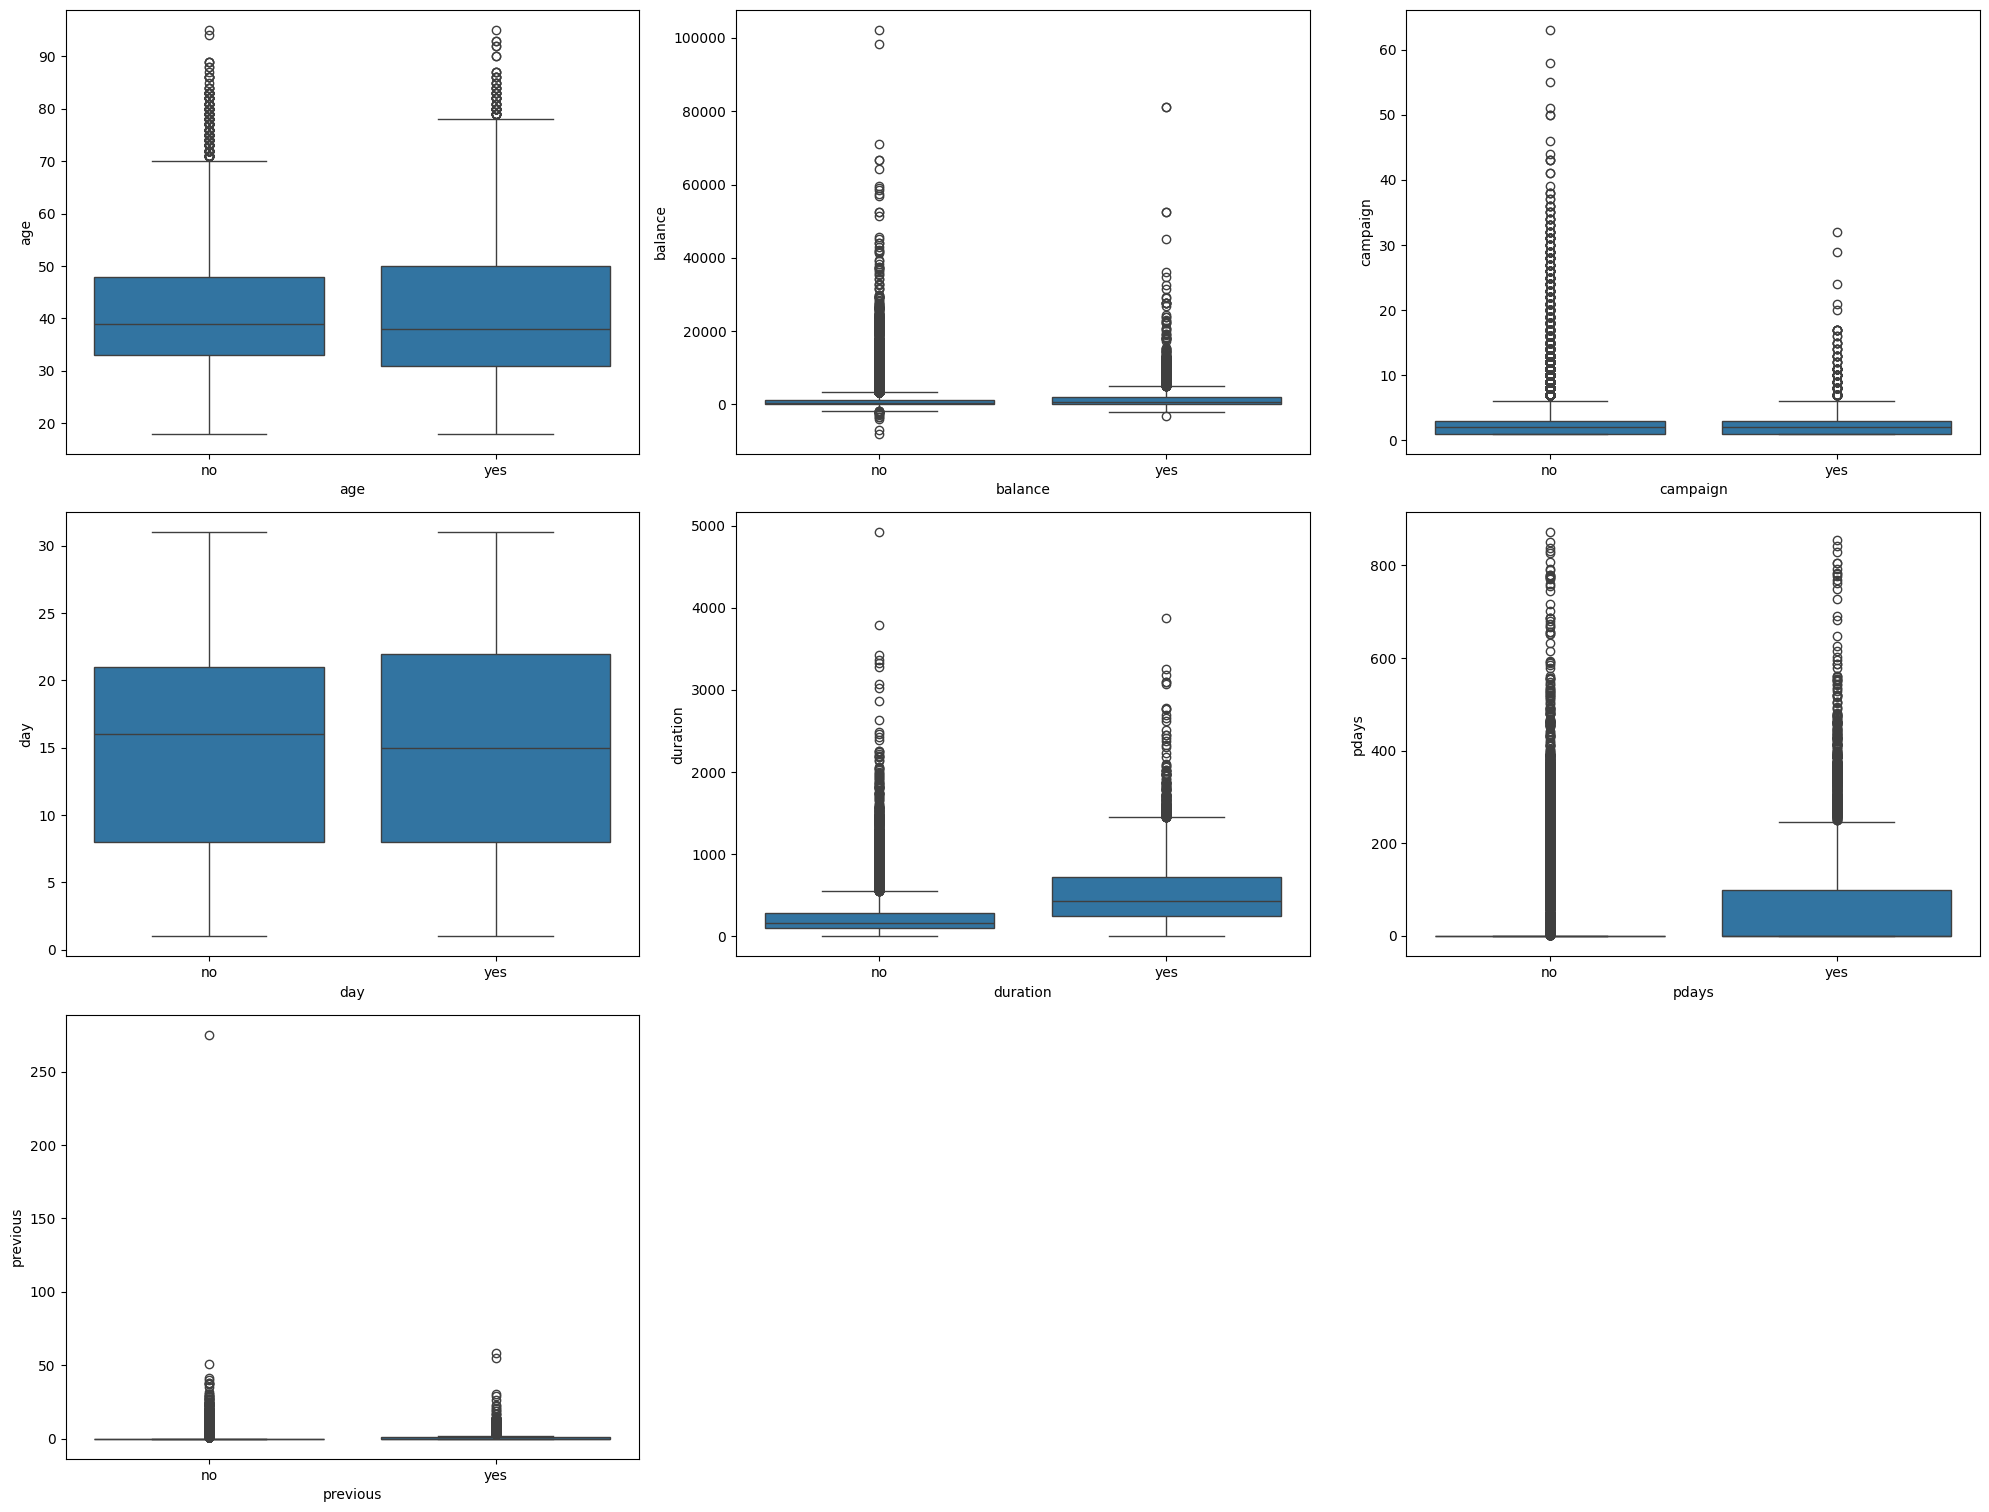

In [72]:
#boxplot to show target distribution with respect
plt.figure(figsize=(20, 60), facecolor='white')
for i, feature in enumerate(continuous_features, 1):
    ax = plt.subplot(12, 3, i)
    sns.boxplot(x="y", y=feature, data=df)
    ax.set_xlabel(feature)
plt.tight_layout()
plt.show()


13. Find Outliers in numerical features

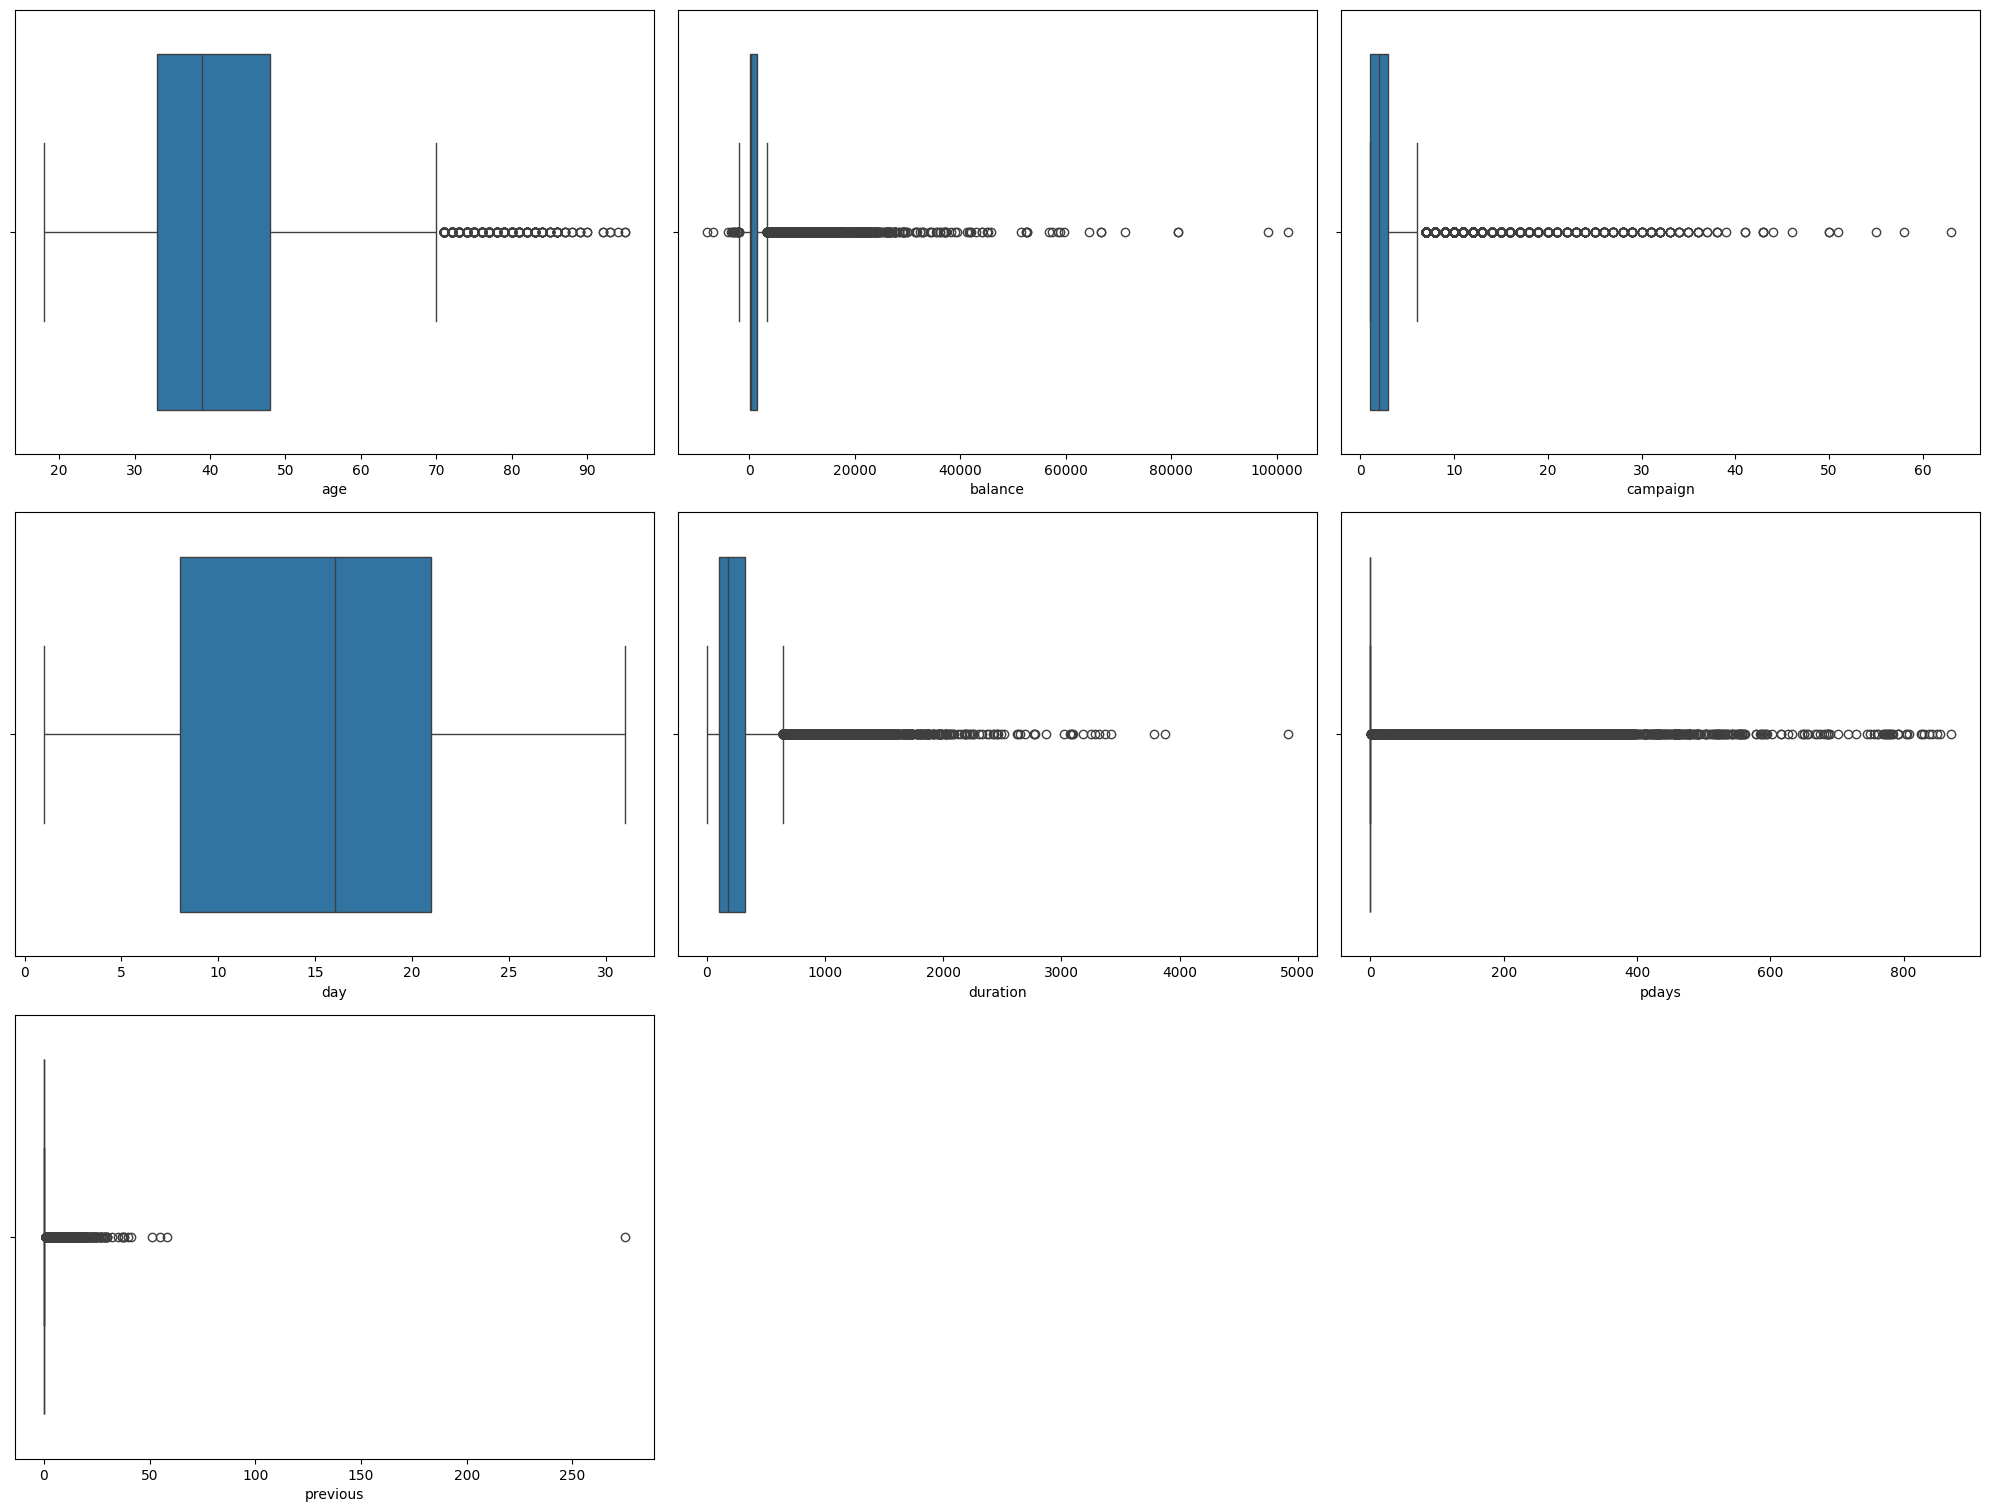

In [73]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20, 60), facecolor='white')
for i, numerical_feature in enumerate(numerical_features, 1):
    ax = plt.subplot(12, 3, i)
    sns.boxplot(x=df[numerical_feature])
    ax.set_xlabel(numerical_feature)
plt.tight_layout()
plt.show()


14. Explore the Correlation between numerical features

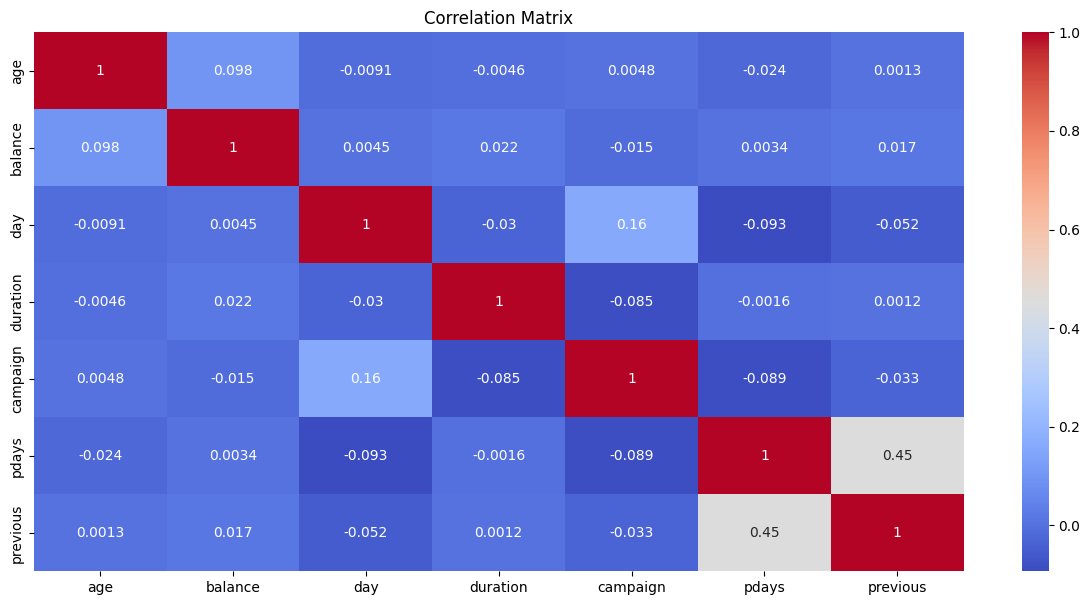

In [76]:
# Select only numeric columns from the dataframe
numeric_df = df.select_dtypes('number')

# Compute the correlation matrix
cor_mat = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


15. Check the Data set is balanced or not based on target values in classification

Class distribution before balancing: Counter({0: 31937, 1: 4231})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after balancing: Counter({0: 31937, 1: 31937})


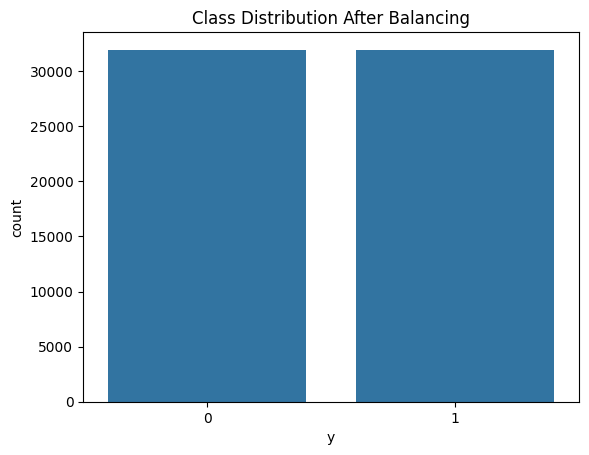

In [87]:
# Step 1: Encode categorical features
X = pd.get_dummies(df.drop(columns=['y']), drop_first=True)  # One-hot encoding for categorical variables
y = df['y'].map({'no': 0, 'yes': 1})  # Map target variable to numeric values (0 and 1)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Check the class distribution before balancing
print("Class distribution before balancing:", Counter(y_train))

# Step 4: Fix the imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 5: Check the class distribution after balancing
print("Class distribution after balancing:", Counter(y_train_balanced))

# Step 6: Plot the balanced target variable distribution
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After Balancing")
plt.show()


In [88]:
len(X_train)

36168

In [89]:
len(X_test)

9043

# Model Selection

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Instantiate a basic Random Forest model
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter tuning using GridSearchCV (Optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("\nBest Hyperparameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Accuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))


Accuracy Score: 0.9048988167643481

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.66      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043


Confusion Matrix:
 [[7771  214]
 [ 646  412]]
Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Ensure data is numeric
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Define the ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7714 - loss: 13.5604 - val_accuracy: 0.8936 - val_loss: 4.2086
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7572 - loss: 6.8032 - val_accuracy: 0.5539 - val_loss: 1.7562
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 3.5450 - val_accuracy: 0.7058 - val_loss: 0.6864
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 1.6548 - val_accuracy: 0.8950 - val_loss: 0.5637
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8267 - loss: 1.1992 - val_accuracy: 0.8950 - val_loss: 0.5314
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8486 - loss: 0.6543 - val_accuracy: 0.8950 - val_loss: 0.4720
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8737 - loss: 0.5901 - val_accuracy: 0.8936 - val_loss: 0.4446
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8791 - loss: 0.6070 - val_accuracy: 0.8950 - val_loss